In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [90]:
train = pd.read_csv('titanic_train.csv')

In [91]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


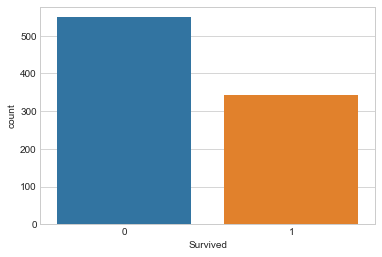

In [93]:
sns.countplot(x='Survived',data=train)

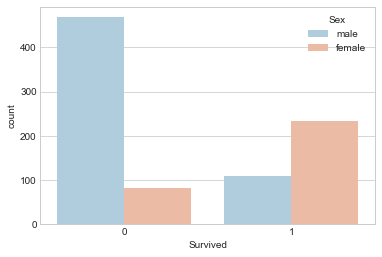

In [94]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')   #Changing the color scheme to make it easier to visualize.
                                                                    #Women lived more than 2X as much as Men.

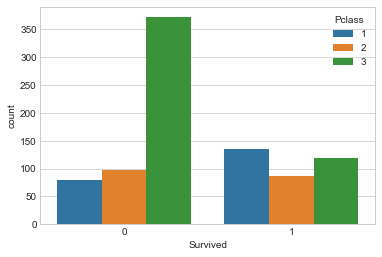

In [95]:
sns.countplot(x='Survived',hue='Pclass',data=train)  ###1st class clearly survived the most.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


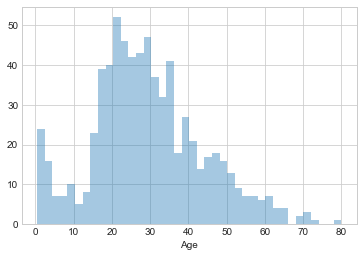

In [96]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)  ###Shows the majority of passengers were between 20-40

In [97]:
train.info()  ###Shows that we're missing a lot of data for the Cabin, and about 15% for the Age.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


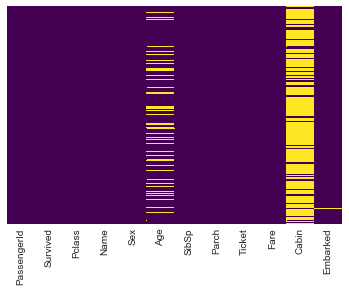

In [98]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')   ###Yellow indicates missing values. Will likely add 
                                                                          ###the mean value of age to fill Null values, and drop
                                                                          ###the cabin column.

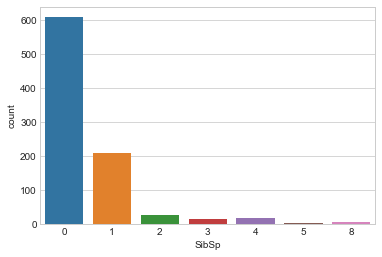

In [99]:
sns.countplot(x='SibSp',data=train)

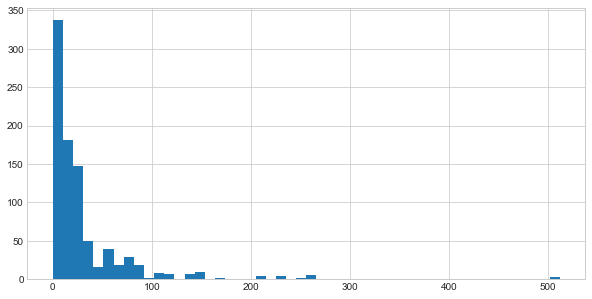

In [100]:
train['Fare'].hist(bins=50,figsize=(10,5))

In [101]:
###PART TWO OF LECTURE: CLEANING UP DATA

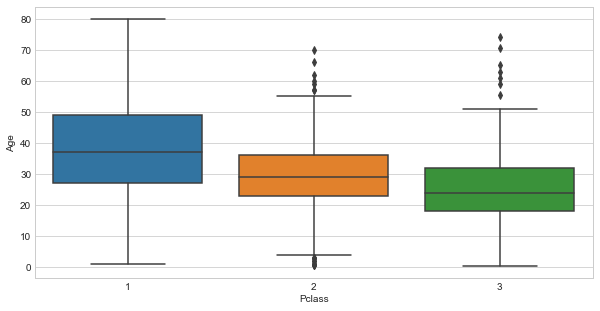

In [102]:
plt.figure(figsize=(10,5))  
sns.boxplot(x='Pclass',y='Age',data=train)      ###Average age of more expensive tickets came from older people

In [103]:
###Creating a function in order to clean up the null values, and replace with mean age.

In [104]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [105]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

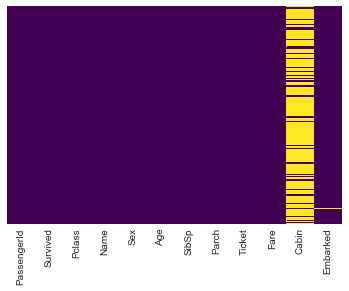

In [106]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
train.drop('Cabin',axis=1,inplace=True)

In [108]:
train.dropna(inplace=True)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [110]:
###Creating dummy variables for sex and embarked, in order to fit 
###additional features into algorithm efficiently.

In [111]:
sex = pd.get_dummies(train['Sex'])
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [112]:
train = pd.concat([train,sex,embark],axis=1)

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
female         889 non-null uint8
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(4)
memory usage: 86.8+ KB


In [114]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [115]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [116]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [117]:
X = train.drop('Survived',axis=1)

In [118]:
y = train['Survived']

In [119]:
###Creating the logistic regression model, followed by training
###and testing it's accuracy.

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [122]:
logmodel = LogisticRegression()

In [123]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
predictions = logmodel.predict(X_test)

In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [126]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86       163
          1       0.83      0.67      0.74       104

avg / total       0.82      0.82      0.82       267



In [127]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 34,  70]], dtype=int64)